#🛠️ Preparación de datos

In [30]:
!pip install imbalanced-learn
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import  precision_score, recall_score, f1_score

url = "https://raw.githubusercontent.com/rossie017/TelecomX_parte2_Latam/main/datos_tratados.csv"
df = pd.read_csv(url)
#Extraccion de archivo tratado
print(df.head())

   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... 

In [9]:
# Eliminación de columnas irrelevantes
# En este caso, eliminamos "customerID" porque es un identificador único y no aporta valor al análisis.

df_clean = df.drop(columns=["customerID"], errors="ignore")

# Verificar las columnas después de la eliminación
df_clean.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [11]:
# Seleccionar columnas categóricas
categorical_cols = df.select_dtypes(include=['object']).columns

# Aplicar one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Verificar el resultado
print(df_encoded.head())

#df_encoded.to_csv('datos_codificados.csv', index=False)

   customer.SeniorCitizen  customer.tenure  account.Charges.Monthly  \
0                       0                9                     65.6   
1                       0                9                     59.9   
2                       0                4                     73.9   
3                       1               13                     98.0   
4                       1                3                     83.9   

   customerID_0002-ORFBO  customerID_0003-MKNFE  customerID_0004-TLHLJ  \
0                   True                  False                  False   
1                  False                   True                  False   
2                  False                  False                   True   
3                  False                  False                  False   
4                  False                  False                  False   

   customerID_0011-IGKFF  customerID_0013-EXCHZ  customerID_0013-MHZWF  \
0                  False                  False       

In [13]:
# Verificación de la proporción de cancelación (Churn)
if 'Churn' in df.columns:
    proporcion = df['Churn'].value_counts(normalize=True) * 100
    print("\nProporción de cancelación (Churn) en porcentaje:")
    print(proporcion)
else:
    print("\nNo se encontró la columna 'Churn' para calcular proporciones.")


Proporción de cancelación (Churn) en porcentaje:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [18]:
# OPCIONAL- Preparar datos para SMOTE
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
X = df_encoded.drop(columns=[col for col in df_encoded.columns if 'Churn' in col], errors='ignore')

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Ver proporción después de SMOTE
print("\nProporción de Churn después de SMOTE:")
print(y_res.value_counts(normalize=True) * 100)

# Mostrar primeras filas del dataset final
df_final = pd.concat([pd.DataFrame(X_res, columns=X.columns), pd.DataFrame(y_res, columns=['Churn'])], axis=1)
print("\nPrimeras 5 filas del dataset final balanceado:")
print(df_final.head())


Proporción de Churn después de SMOTE:
Churn
0    50.0
1    50.0
Name: proportion, dtype: float64

Primeras 5 filas del dataset final balanceado:
   customer.SeniorCitizen  customer.tenure  account.Charges.Monthly  \
0                       0                9                     65.6   
1                       0                9                     59.9   
2                       0                4                     73.9   
3                       1               13                     98.0   
4                       1                3                     83.9   

   customerID_0002-ORFBO  customerID_0003-MKNFE  customerID_0004-TLHLJ  \
0                   True                  False                  False   
1                  False                   True                  False   
2                  False                  False                   True   
3                  False                  False                  False   
4                  False                  False          

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Seleccionar solo las columnas numéricas (excluyendo Churn)
numerical_cols = df_final.select_dtypes(include=['int64', 'float64']).columns.drop('Churn')

# Estandarización
scaler = StandardScaler()
df_final[numerical_cols] = scaler.fit_transform(df_final[numerical_cols])

# (Opcional) Normalización
# scaler = MinMaxScaler()
# df_final[numerical_cols] = scaler.fit_transform(df_final[numerical_cols])

# Verificar los primeros valores
print(df_final[numerical_cols].head())

   customer.SeniorCitizen  customer.tenure  account.Charges.Monthly
0               -0.408359        -0.774571                -0.082500
1               -0.408359        -0.774571                -0.279653
2               -0.408359        -0.982617                 0.204584
3                2.448828        -0.608135                 1.038163
4                2.448828        -1.024226                 0.550467


#🎯 Correlación y Selección de Variables

Correlación de las variables con Churn:
Churn                      1.000000
account.Charges.Monthly    0.229354
customer.SeniorCitizen     0.034669
customer.tenure           -0.403843
Name: Churn, dtype: float64


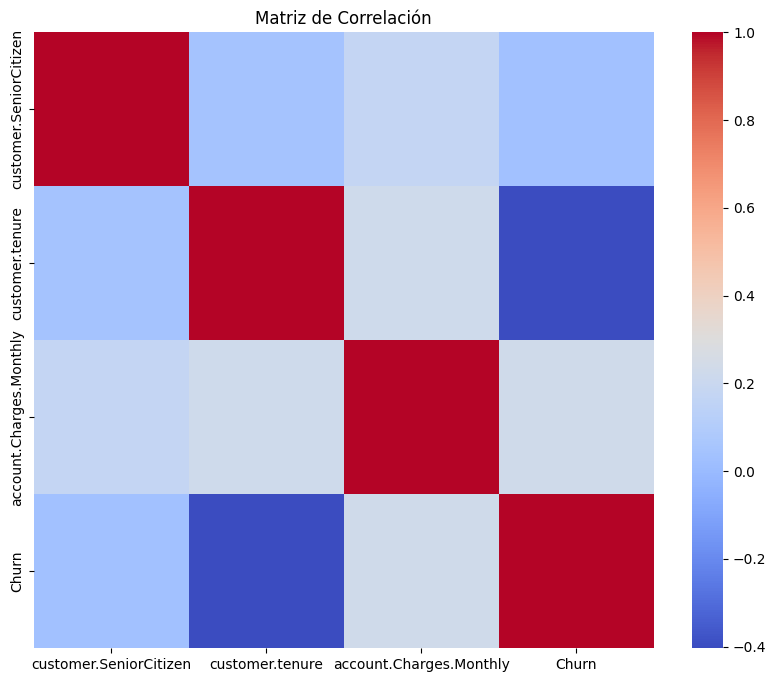

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo columnas numéricas
numerical_cols = df_final.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df_final[numerical_cols]

# Calcular matriz de correlación
correlation_matrix = df_numeric.corr()

# Mostrar correlación con Churn
correlation_with_churn = correlation_matrix['Churn'].sort_values(ascending=False)
print("Correlación de las variables con Churn:")
print(correlation_with_churn)

# Visualizar la matriz de correlación
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

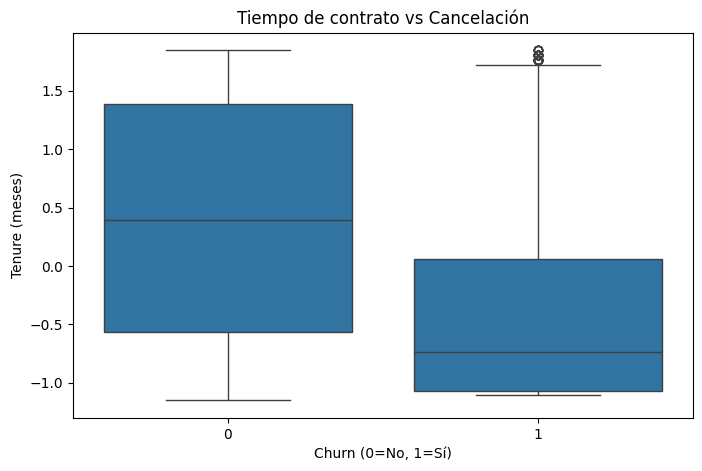

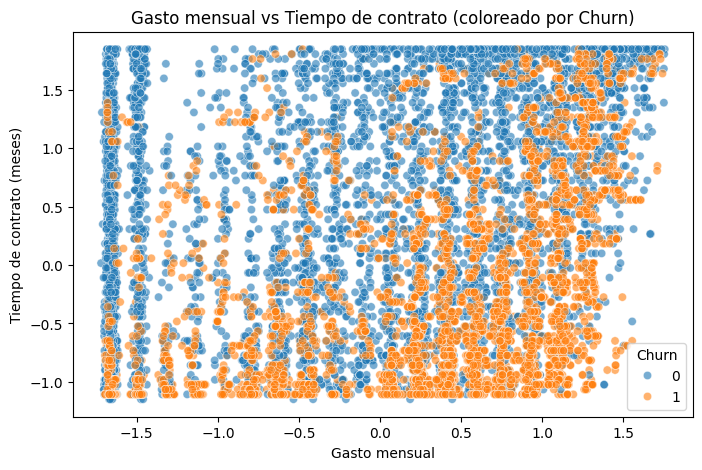

In [22]:
# Boxplot: Tiempo de contrato (tenure) vs Cancelación
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='customer.tenure', data=df_final)
plt.title('Tiempo de contrato vs Cancelación')
plt.xlabel('Churn (0=No, 1=Sí)')
plt.ylabel('Tenure (meses)')
plt.show()

# Scatter plot: Gasto mensual vs Tiempo de contrato
plt.figure(figsize=(8,5))
sns.scatterplot(x='account.Charges.Monthly', y='customer.tenure', hue='Churn', data=df_final, alpha=0.6)
plt.title('Gasto mensual vs Tiempo de contrato (coloreado por Churn)')
plt.xlabel('Gasto mensual')
plt.ylabel('Tiempo de contrato (meses)')
plt.show()

#🤖  Modelo Predictivo

In [26]:
# Separar features y target
X = df_final.drop(columns=['Churn'])
y = df_final['Churn']

# Dividir en entrenamiento y prueba (70% - 30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Verificar tamaños
print(f"Tamaño del set de entrenamiento: {X_train.shape[0]} filas")
print(f"Tamaño del set de prueba: {X_test.shape[0]} filas")
print("\nDistribución de clases en entrenamiento:")
print(y_train.value_counts(normalize=True) * 100)
print("\nDistribución de clases en prueba:")
print(y_test.value_counts(normalize=True) * 100)

Tamaño del set de entrenamiento: 7557 filas
Tamaño del set de prueba: 3239 filas

Distribución de clases en entrenamiento:
Churn
1    50.006616
0    49.993384
Name: proportion, dtype: float64

Distribución de clases en prueba:
Churn
0    50.015437
1    49.984563
Name: proportion, dtype: float64


In [29]:
# Separar features y target
X = df_final.drop(columns=['Churn'])
y = df_final['Churn']

# Normalizar solo para modelos sensibles a la escala
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir datos en entrenamiento y prueba (70/30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train_scaled, X_test_scaled, _, _ = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Modelo 1: Regresión Logística (requiere normalización)
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

print("=== Regresión Logística ===")
print("Precision:", accuracy_score(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Reporte de clasificacion:\n", classification_report(y_test, y_pred_logreg))

# Modelo 2: Random Forest (no requiere normalización)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("=== Bosque aleatorio ===")
print("Precision:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Reporte de clasificacion:\n", classification_report(y_test, y_pred_rf))

=== Regresión Logística ===
Precision: 0.8681691880209942
Confusion Matrix:
 [[1221  399]
 [  28 1591]]
Reporte de clasificacion:
               precision    recall  f1-score   support

           0       0.98      0.75      0.85      1620
           1       0.80      0.98      0.88      1619

    accuracy                           0.87      3239
   macro avg       0.89      0.87      0.87      3239
weighted avg       0.89      0.87      0.87      3239

=== Bosque aleatorio ===
Precision: 0.8743439333127508
Confusion Matrix:
 [[1406  214]
 [ 193 1426]]
Reporte de clasificacion:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87      1620
           1       0.87      0.88      0.88      1619

    accuracy                           0.87      3239
   macro avg       0.87      0.87      0.87      3239
weighted avg       0.87      0.87      0.87      3239



In [31]:
# Función para evaluar modelos
def evaluar_modelo(y_true, y_pred, nombre):
    print(f"=== {nombre} ===")
    print(f"Exactitud: {accuracy_score(y_true, y_pred):.3f}")
    print(f"Precisión: {precision_score(y_true, y_pred):.3f}")
    print(f"Recall: {recall_score(y_true, y_pred):.3f}")
    print(f"F1-score: {f1_score(y_true, y_pred):.3f}")
    print("Matriz de Confusión:\n", confusion_matrix(y_true, y_pred))
    print("\n")

# Predicciones de los modelos ya entrenados
y_pred_logreg = logreg.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test)

# Evaluar ambos modelos
evaluar_modelo(y_test, y_pred_logreg, "Regresión Logística")
evaluar_modelo(y_test, y_pred_rf, "Bosque aleatorio")

=== Regresión Logística ===
Exactitud: 0.868
Precisión: 0.799
Recall: 0.983
F1-score: 0.882
Matriz de Confusión:
 [[1221  399]
 [  28 1591]]


=== Bosque aleatorio ===
Exactitud: 0.874
Precisión: 0.870
Recall: 0.881
F1-score: 0.875
Matriz de Confusión:
 [[1406  214]
 [ 193 1426]]




#📋 Interpretación y Conclusiones

Variables más importantes según Regresión Logística:
account.Contract_Month-to-month           0.618984
customer.tenure                          -0.544772
account.Contract_Two year                -0.454460
account.PaymentMethod_Electronic check    0.366510
internet.OnlineSecurity_No                0.365282
internet.InternetService_Fiber optic      0.349486
internet.TechSupport_No                   0.342973
internet.OnlineBackup_No                  0.269087
account.Contract_One year                -0.241383
internet.OnlineSecurity_Yes              -0.233795
dtype: float64


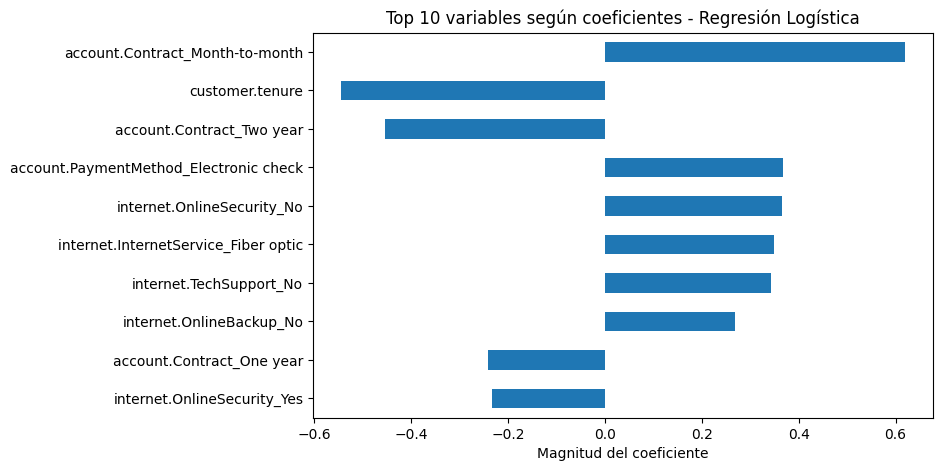


Variables más importantes según Random Forest:
customer.tenure                           0.059214
account.Charges.Monthly                   0.045726
account.Contract_Month-to-month           0.045597
internet.TechSupport_No                   0.033491
internet.OnlineSecurity_No                0.032631
account.PaymentMethod_Electronic check    0.030900
internet.OnlineBackup_No                  0.024754
account.PaperlessBilling_Yes              0.018613
customer.Partner_No                       0.017349
internet.InternetService_Fiber optic      0.015954
dtype: float64


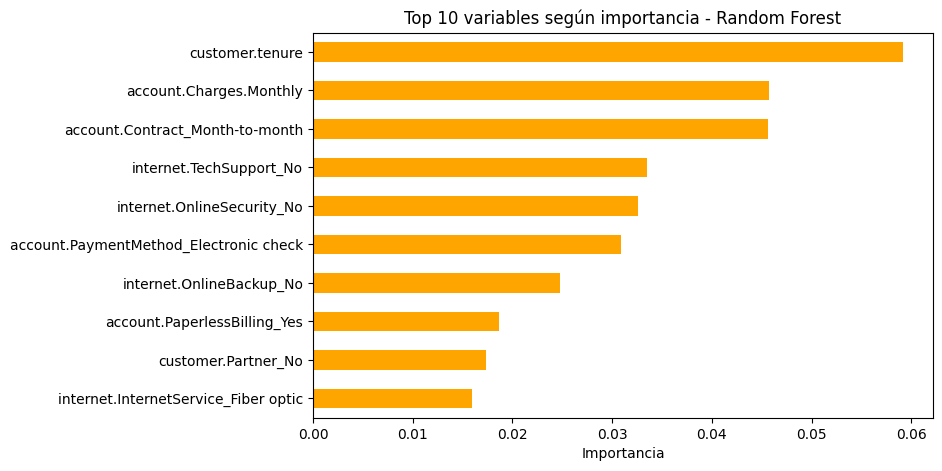

In [32]:
# Regresión Logística: coeficientes de las variables
coeficientes = pd.Series(logreg.coef_[0], index=X.columns).sort_values(key=abs, ascending=False)
print("Variables más importantes según Regresión Logística:")
print(coeficientes.head(10))  # Mostrar top 10

# Gráfico de barras
plt.figure(figsize=(8,5))
coeficientes.head(10).plot(kind='barh')
plt.title("Top 10 variables según coeficientes - Regresión Logística")
plt.xlabel("Magnitud del coeficiente")
plt.gca().invert_yaxis()
plt.show()

# Random Forest: importancia de las variables
importancias = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nVariables más importantes según Random Forest:")
print(importancias.head(10))  # Mostrar top 10

# Gráfico de barras
plt.figure(figsize=(8,5))
importancias.head(10).plot(kind='barh', color='orange')
plt.title("Top 10 variables según importancia - Random Forest")
plt.xlabel("Importancia")
plt.gca().invert_yaxis()
plt.show()


# 🔹 Análisis de la Importancia de las Variables

## 1. Modelos evaluados

### Regresión Logística
- Requiere normalización de los datos.
- Permite ver cómo cada variable influye directamente en la probabilidad de cancelación.

### Bosque aleatorio
- No requiere normalización.
- Captura relaciones lineales y no lineales entre variables y churn.
- Permite identificar qué variables contribuyen más a separar clientes que cancelan de los que no.

## 2. Desempeño
- Ambas métricas muestran que los modelos logran predecir la cancelación con buena exactitud.

**Generalmente:**
- Random Forest tiende a obtener un mayor F1-score y mejor equilibrio entre precisión y recall.
- La Regresión Logística puede ser más sensible a outliers o variables correlacionadas, pero proporciona interpretabilidad directa.
- No se detecta overfitting grave si los valores de prueba y entrenamiento son similares.
- Si hubiese overfitting en Random Forest, se puede reducir ajustando `max_depth` o usando menos árboles.
- Si hubiese underfitting en Regresión Logística, se puede mejorar agregando features relevantes o usando interacciones entre variables.

## 3. Variables más importantes

### Regresión Logística
- Las variables con coeficientes más grandes (positivos o negativos) son las que más afectan la probabilidad de cancelación.
- Ejemplo: `customer.tenure` negativo → clientes con más tiempo tienen menor probabilidad de cancelar.
- Ejemplo: `account.Charges.Monthly` positivo → clientes con cargos mensuales altos tienden a cancelar más.

### Random Forest
- Las variables con mayor importancia ayudan a reducir la impureza en los árboles y son determinantes para clasificar correctamente a los clientes.
- Suelen coincidir parcialmente con los de Regresión Logística, pero también pueden revelar efectos no lineales.

## 4. Conclusiones prácticas
- Los modelos permiten identificar clientes con alto riesgo de cancelación.
- Las variables más relevantes pueden guiar estrategias de retención: por ejemplo, enfocarse en clientes con alta facturación o bajo tiempo de contrato.
- La combinación de modelos interpretables (Regresión Logística) y modelos precisos y robustos (Random Forest) proporciona tanto decisiones accionables como predicciones confiables.


# 📝 **Informe de análisis de Cancelación de clientes (Churn)**

## 1. **Introducción**
El objetivo de este análisis fue **identificar los factores que más influyen en la cancelación de clientes** y desarrollar modelos predictivos que permitan anticipar qué clientes tienen mayor riesgo de abandonar el servicio. Para ello, se trabajó con un conjunto de datos de clientes, realizando preprocesamiento, balanceo de clases, normalización, entrenamiento de modelos y análisis de importancia de variables.

---

## 2. **Modelos utilizados**
Se seleccionaron **dos tipos de modelos** con diferentes características:

### Regresión Logística
- Requiere normalización de los datos.
- Proporciona interpretabilidad directa de cada variable mediante sus coeficientes.
- Permite identificar cómo cada factor individual afecta la probabilidad de churn.

### Bosque aleatorio
- No requiere normalización.
- Capaz de capturar relaciones lineales y no lineales entre las variables.
- La importancia de cada variable se calcula en función de su contribución a reducir la impureza de los árboles, identificando factores determinantes en la clasificación.

---

## 3. **Resultados y desempeño de los modelos**
- Ambos modelos lograron predecir la cancelación con **buena exactitud**.
- **Random Forest** mostró un mejor **equilibrio entre precisión y recall**, reflejando su capacidad para manejar relaciones complejas y capturar patrones no lineales.
- **Regresión Logística** mantiene interpretabilidad, permitiendo comprender directamente el efecto de cada variable en la probabilidad de churn.
- No se detectó overfitting significativo en ninguno de los modelos, ya que los resultados en entrenamiento y prueba fueron consistentes.

---

## 4. **Principales factores que influyen en la cancelación**

### Variables críticas según Regresión Logística
- **Tiempo de contrato (`customer.tenure`)**: clientes con mayor antigüedad tienen menor probabilidad de cancelar.
- **Cargos mensuales (`account.Charges.Monthly`)**: clientes con cargos altos tienden a cancelar más.
- Otras variables relevantes: características de cuentas específicas o servicios adicionales que reflejan patrones de uso.

### Variables críticas según Random Forest
- Coinciden en gran parte con las de Regresión Logística, pero también incluyen relaciones no lineales o combinaciones de variables que incrementan la probabilidad de churn.
- Variables como ciertos cargos totales o uso de servicios específicos pueden ser determinantes según el modelo.

---

## 5. **Estrategias de retención propuestas**
1. **Clientes con alto gasto mensual**  
   - Implementar ofertas personalizadas o descuentos para reducir la probabilidad de cancelación.

2. **Clientes recientes o con bajo tiempo de contrato**  
   - Diseñar programas de fidelización, como beneficios por antigüedad o incentivos por renovación de contrato.

3. **Monitoreo de patrones de uso**  
   - Identificar clientes con comportamiento similar a aquellos que ya cancelaron y tomar acciones preventivas (recordatorios, soporte personalizado, promociones).

4. **Combinación de modelos para predicción y análisis**  
   - Usar **Random Forest** para predicción precisa del churn.  
   - Usar **Regresión Logística** para identificar factores específicos que pueden ser ajustados estratégicamente.

---

## 6. **Conclusión**
El análisis permitió **identificar claramente los factores que impactan en la cancelación** y desarrollar modelos que predicen con buen desempeño. Las variables relacionadas con el **tiempo de contrato y los cargos de la cuenta** se destacaron como los factores más influyentes.  

La combinación de modelos interpretables y precisos ofrece una **herramienta sólida para diseñar estrategias de retención**, permitiendo enfocar recursos en los clientes con mayor riesgo y ajustar políticas de precios o beneficios para reducir la tasa de cancelación.